# Implementación k-means con el método kmeans de Scikit learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn import metrics
import sys

In [2]:
df = pd.read_csv('College.csv')
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df['Private'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
t1=time.time()

Creamos un modelo de k-means con 2 cluster.

In [5]:
kmeans=KMeans(n_clusters=2)

Ahora ajustamos el modelo a los datos.

In [6]:
x=df.values
y_kmeans= kmeans.fit_predict(x)

In [7]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=2')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=2
Tiempo de ejecucion: 0.049386024475097656 segundos


In [8]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
kmeans.cluster_centers_

array([[7.93721973e-01, 1.81323468e+03, 1.28716592e+03, 4.91044843e+02,
        2.53094170e+01, 5.34708520e+01, 2.18854858e+03, 5.95458894e+02,
        1.03957085e+04, 4.31136472e+03, 5.41982063e+02, 1.28033632e+03,
        7.04424514e+01, 7.78251121e+01, 1.40997010e+01, 2.31748879e+01,
        8.93204634e+03, 6.51195815e+01],
       [3.14814815e-01, 1.03631389e+04, 6.55089815e+03, 2.56972222e+03,
        4.14907407e+01, 7.02037037e+01, 1.30619352e+04, 2.46486111e+03,
        1.07191759e+04, 4.64347222e+03, 5.95212963e+02, 1.71420370e+03,
        8.63981481e+01, 9.13333333e+01, 1.40277778e+01, 2.00740741e+01,
        1.41705000e+04, 6.75925926e+01]])

In [10]:
# Medimos el tamaño en bytes del objeto
print(sys.getsizeof(y_kmeans), 'bytes')

3204 bytes


In [11]:
metrics.silhouette_score(x, y_kmeans, metric='euclidean')

0.5599267811400582

In [12]:
t1=time.time()

In [13]:
kmeans=KMeans(n_clusters=3)
x=df.values
y_kmeans= kmeans.fit_predict(x)

In [14]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=3')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=3
Tiempo de ejecucion: 0.04448699951171875 segundos


In [15]:
y_kmeans

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

In [16]:
kmeans.cluster_centers_

array([[7.61061947e-01, 1.70182301e+03, 1.23653451e+03, 4.91520354e+02,
        2.18194690e+01, 4.97769912e+01, 2.22618053e+03, 6.56030088e+02,
        9.28193982e+03, 4.14370619e+03, 5.37015929e+02, 1.32979646e+03,
        6.75787611e+01, 7.51433628e+01, 1.46362832e+01, 2.09274336e+01,
        7.83074690e+03, 6.28070796e+01],
       [8.43373494e-02, 1.06216145e+04, 7.30063855e+03, 2.93942169e+03,
        3.20000000e+01, 6.34698795e+01, 1.54825060e+04, 3.17455422e+03,
        8.23585542e+03, 4.13487952e+03, 5.94349398e+02, 1.88833735e+03,
        8.41566265e+01, 8.95542169e+01, 1.64072289e+01, 1.58072289e+01,
        9.44095181e+03, 6.05060241e+01],
       [9.92248062e-01, 3.79185271e+03, 2.04663566e+03, 6.53937984e+02,
        4.98372093e+01, 7.72248062e+01, 2.57355039e+03, 2.35829457e+02,
        1.69343256e+04, 5.43727907e+03, 5.74604651e+02, 1.03575194e+03,
        8.75193798e+01, 9.33333333e+01, 1.02046512e+01, 3.51627907e+01,
        1.78138140e+04, 8.02868217e+01]])

In [17]:
metrics.silhouette_score(x, y_kmeans, metric='euclidean')

0.4759356715031701

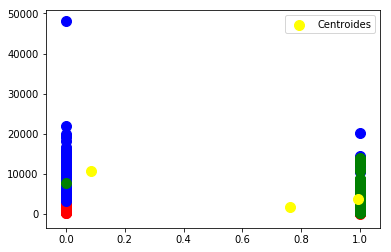

In [18]:
#Visualizamos los cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue',)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')



#Graficamos los centroides en amarillo
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroides')

plt.legend()

In [19]:
t1=time.time()

In [20]:
kmeans=KMeans(n_clusters=4)
x=df.values
y_kmeans= kmeans.fit_predict(x)

In [21]:
t2=time.time()
tiempo = float(t2-t1)

print('K-means utilizando scipy.kmeans() para k=4')
print("Tiempo de ejecucion: {} segundos".format(tiempo))

K-means utilizando scipy.kmeans() para k=4
Tiempo de ejecucion: 0.061148881912231445 segundos


In [22]:
y_kmeans

array([0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 2, 1,
       0, 1, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 1, 3, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 0, 3, 0,
       0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 3, 2,
       0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 3, 3, 0, 3, 1, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3,
       0, 3, 1, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       3, 3, 3, 0, 0, 0, 0, 3, 2, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 2, 0,
       0, 3, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0,

In [23]:
kmeans.cluster_centers_

array([[7.12153518e-01, 1.67909382e+03, 1.20654158e+03, 5.02245203e+02,
        2.03454158e+01, 4.80191898e+01, 2.32546055e+03, 7.21164179e+02,
        8.45028145e+03, 3.95973987e+03, 5.31840085e+02, 1.36672921e+03,
        6.56183369e+01, 7.31321962e+01, 1.50407249e+01, 1.95628998e+01,
        7.30658422e+03, 6.07633262e+01],
       [8.53658537e-02, 1.07111341e+04, 7.35846341e+03, 2.95760976e+03,
        3.21585366e+01, 6.37195122e+01, 1.55374756e+04, 3.11045122e+03,
        8.28236585e+03, 4.15140244e+03, 5.95500000e+02, 1.87660976e+03,
        8.42926829e+01, 8.97560976e+01, 1.63512195e+01, 1.59512195e+01,
        9.49881707e+03, 6.08902439e+01],
       [1.00000000e+00, 9.34175000e+03, 3.60625000e+03, 1.32195000e+03,
        7.60500000e+01, 9.17000000e+01, 5.28320000e+03, 4.27200000e+02,
        1.81197500e+04, 6.04275000e+03, 5.76600000e+02, 1.25555000e+03,
        9.33000000e+01, 9.68000000e+01, 6.61500000e+00, 3.53500000e+01,
        3.23479000e+04, 8.89500000e+01],
       [9.902

In [24]:
metrics.silhouette_score(x, y_kmeans, metric='euclidean')

0.3820802069529434